# **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

# **Hey there!**
Today, I'm going to show you how to build a **Logistic Regression Model**. Let's start by loading the **Titanic dataset** from scikit-learn:

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Exploring The Data**

In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
df.shape

(891, 15)

In [6]:
check_gender = df['sex'].value_counts()
check_gender

sex
male      577
female    314
Name: count, dtype: int64

In [7]:
adult_male = df['adult_male'].value_counts()
adult_male

adult_male
True     537
False    354
Name: count, dtype: int64

In [8]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

**Checking The NULL Values**

In [9]:
null_values = df.isnull().sum()
null_values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# **In the Above OutPut**

You can see that we have **NULL values in age, deck, embarked, and embark_town column** so let's fill them.

To start, I'll replace the missing age values in the dataset with the **Average Age** of all the passengers.

In [10]:
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
df.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [13]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0]) # filling Missing deck values with the most common deck
df['sex'] = df['sex'].map({'male': 1,'female' : 0})

df = df.astype({'alone': int}) # from booltype into Int type
df = df.astype({'adult_male': int}) # from booltype into Int type

df['who'] = df['who'].map({'child': -1, 'woman':0, 'man':1}) # Encodes 'who' as numerical values.

df['alive'] = df['alive'].map({'yes':1, 'no':0}) # Converts 'alive' to numerical values

In [14]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,1,1,C,Southampton,0,0
1,1,1,0,38.0,1,0,71.2833,C,First,0,0,C,Cherbourg,1,0
2,1,3,0,26.0,0,0,7.9250,S,Third,0,0,C,Southampton,1,1
3,1,1,0,35.0,1,0,53.1000,S,First,0,0,C,Southampton,1,0
4,0,3,1,35.0,0,0,8.0500,S,Third,1,1,C,Southampton,0,1


In [15]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [16]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# **In The Above Code**

These lines of code **replaces missing values** in the **embarked and embark_town column** with the **most common (mode) value** among non-missing entries.

In [17]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,S,Third,1,1,C,Southampton,0,0
1,1,1,0,38.000000,1,0,71.2833,C,First,0,0,C,Cherbourg,1,0
2,1,3,0,26.000000,0,0,7.9250,S,Third,0,0,C,Southampton,1,1
3,1,1,0,35.000000,1,0,53.1000,S,First,0,0,C,Southampton,1,0
4,0,3,1,35.000000,0,0,8.0500,S,Third,1,1,C,Southampton,0,1
5,0,3,1,29.699118,0,0,8.4583,Q,Third,1,1,C,Queenstown,0,1
6,0,1,1,54.000000,0,0,51.8625,S,First,1,1,E,Southampton,0,1
7,0,3,1,2.000000,3,1,21.0750,S,Third,-1,0,C,Southampton,0,0
8,1,3,0,27.000000,0,2,11.1333,S,Third,0,0,C,Southampton,1,0
9,1,2,0,14.000000,1,0,30.0708,C,Second,-1,0,C,Cherbourg,1,0


# **Removing Unnecessary Columns**

By **removing these Columns**, we can potentially simplify the model and improve its efficiency.

In [19]:
df.drop(['who', 'deck', 'embark_town', 'alive'], axis = 1, inplace = True)


In [20]:
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,1,22.000000,1,0,7.2500,S,Third,1,0
1,1,1,0,38.000000,1,0,71.2833,C,First,0,0
2,1,3,0,26.000000,0,0,7.9250,S,Third,0,1
3,1,1,0,35.000000,1,0,53.1000,S,First,0,0
4,0,3,1,35.000000,0,0,8.0500,S,Third,1,1
5,0,3,1,29.699118,0,0,8.4583,Q,Third,1,1
6,0,1,1,54.000000,0,0,51.8625,S,First,1,1
7,0,3,1,2.000000,3,1,21.0750,S,Third,0,0
8,1,3,0,27.000000,0,2,11.1333,S,Third,0,0
9,1,2,0,14.000000,1,0,30.0708,C,Second,0,0


In [21]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
adult_male    0
alone         0
dtype: int64

# **One-Hot Encoding  | Categorical Variables**

**The Down code** converts the categorical columns **class and embarked** into **Numerical representations using one-hot encoding**

In [22]:
df = pd.get_dummies(df, columns = ['class', 'embarked'])

In [23]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,class_First,class_Second,class_Third,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,1,0,False,False,True,False,False,True
1,1,1,0,38.0,1,0,71.2833,0,0,True,False,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,0,1,False,False,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,0,0,True,False,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,1,1,False,False,True,False,False,True


In [24]:
df['class_First'].dtype

dtype('bool')

# **Converting One-Hot Encoded Columns to Integer Data Type**

**The Down code** converts the **one-hot encoded columns** specified in columns_to_convert to **integer data type**, ensuring compatibility with machine learning algorithms.

In [25]:
columns_to_convert = {'class_First':int, 'class_Second':int, 'class_Third':int, 
                     'embarked_C':int, 'embarked_Q':int, 'embarked_S':int}

df = df.astype(columns_to_convert)

In [26]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,class_First,class_Second,class_Third,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.000000,1,0,7.2500,1,0,0,0,1,0,0,1
1,1,1,0,38.000000,1,0,71.2833,0,0,1,0,0,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1,0,0,0,0,1
4,0,3,1,35.000000,0,0,8.0500,1,1,0,0,1,0,0,1
5,0,3,1,29.699118,0,0,8.4583,1,1,0,0,1,0,1,0
6,0,1,1,54.000000,0,0,51.8625,1,1,1,0,0,0,0,1
7,0,3,1,2.000000,3,1,21.0750,0,0,0,0,1,0,0,1
8,1,3,0,27.000000,0,2,11.1333,0,0,0,0,1,0,0,1
9,1,2,0,14.000000,1,0,30.0708,0,0,0,1,0,1,0,0


# **Removing Redundant Features**

**The Down code** separates the **features (X)** and the **target variable (y)** for model training.

In [27]:
X = df.drop('survived', axis = 1)
y = df['survived']

**Splitting The Dataset Into Training and Testing**

* **X and y:** These represent the features (independent variables) and the target variable (dependent variable), respectively.
* **test_size=0.2:** This parameter specifies that 20% of the data will be used for testing.
* **random_state=42:** This ensures that the data is split randomly but consistently, making the results reproducible.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
X_train.shape, X_test.shape

((712, 14), (179, 14))

In [30]:
model = lr()

# **Fitting The Data Into Logistic Regression Model**

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

**Making Predictions**

In [32]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

**Checking Model Score**

In [33]:
model.score(X_test, y_test)

0.8100558659217877

In [34]:
cm = confusion_matrix(y_test, y_pred)

# **Creating Heatmap**

Now Let's create a Heatmap To Visualize Our Model Performance!

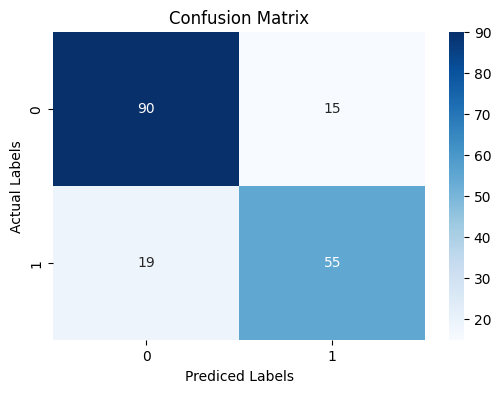

In [35]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'Blues')

plt.xlabel('Prediced Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# **Evaluating Model Performance**

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 

In [37]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision Score: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Model Accuracy: 81.01%
Precision Score: 0.79
Recall: 0.74
F1-Score: 0.76


# **Visualizing Model Performance**

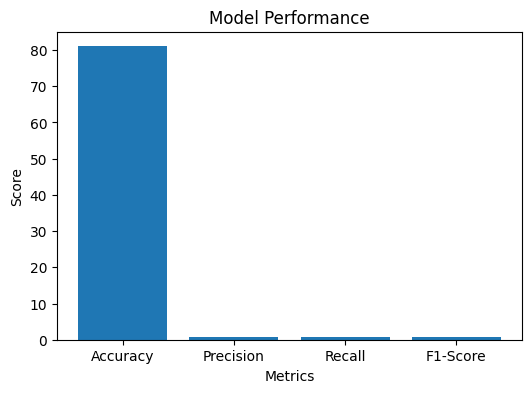

In [38]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy * 100, precision, recall, f1]

plt.figure(figsize = (6, 4))
plt.bar(metrics, scores)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance')
plt.show()

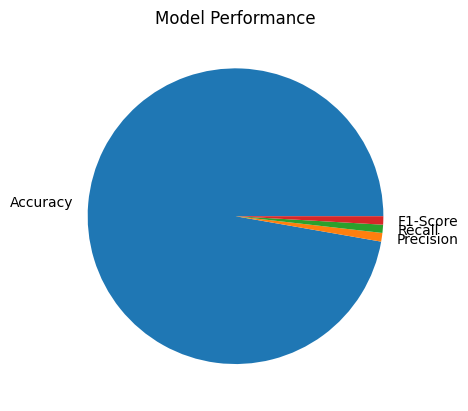

In [39]:
plt.pie(scores, labels = metrics)
plt.title('Model Performance')
plt.show()